In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from scipy.stats import iqr

# Use raw URLs from GitHub
combined_url = 'https://raw.githubusercontent.com/Christian-Albertini/project-4/main/Resources/Merged_Stats_Final_Pos.csv'
all_star_url = 'https://raw.githubusercontent.com/Christian-Albertini/project-4/main/Resources/All_Star_Player_Stats_Cleaned_3.csv'

# Read the CSV files
combined_df = pd.read_csv(combined_url)
all_star_df = pd.read_csv(all_star_url)

combined_df.head()

,Player,Season,Games_Played,All-Star,Plate_Appearances,At_Bats,Runs,Hits,Home_Run,Runs_Batted_In,Stolen_Bases,Walks,Strikeouts,Batting_Average,On_Base_Percentage,Slugging_Percentage,On_Base_Plus_Slugging_Plus_(OPS+),Pos,Standings,WAR
0,Adam Duvall,2023,92,0,353,320,45,79,21,58,4,22,110,0.247,0.303,0.531,119,8,20,1.6
1,Adam Frazier,2023,141,0,455,412,59,99,13,60,11,32,68,0.240,0.300,0.396,94,4,2,1.7
2,Adley Rutschman,2023,154,1,687,588,84,163,20,80,1,92,101,0.277,0.374,0.435,128,2,2,4.3
3,Adolis García,2023,148,1,632,555,108,136,39,107,9,65,175,0.245,0.328,0.508,127,9,7,4.2
4,Akil Baddoo,2023,112,0,357,312,40,68,11,34,14,42,89,0.218,0.310,0.372,88,7,19,0.6


In [2]:
print(combined_df[[
    'Season', 'Games_Played', 'Plate_Appearances', 'At_Bats',
    'Runs', 'Hits', 'Home_Run', 'Runs_Batted_In', 'Stolen_Bases',
    'Walks', 'Strikeouts', 'Batting_Average', 'On_Base_Percentage',
    'On_Base_Plus_Slugging_Plus_(OPS+)', 'Standings', 'WAR'
]].isna().sum())

Season                               0
Games_Played                         0
Plate_Appearances                    0
At_Bats                              0
Runs                                 0
Hits                                 0
Home_Run                             0
Runs_Batted_In                       0
Stolen_Bases                         0
Walks                                0
Strikeouts                           0
Batting_Average                      0
On_Base_Percentage                   0
On_Base_Plus_Slugging_Plus_(OPS+)    0
Standings                            0
WAR                                  3
dtype: int64


In [3]:
combined_df = combined_df.dropna()

In [20]:
# Apply z-score normalization to the relevant columns
metrics = ['Season', 'Games_Played', 'Plate_Appearances', 'At_Bats', 'Runs', 'Hits', 'Home_Run', 'Runs_Batted_In', 'Stolen_Bases', 'Walks', 'Strikeouts', 'Batting_Average', 'On_Base_Percentage', 'Slugging_Percentage', 'On_Base_Plus_Slugging_Plus_(OPS+)', 'Pos', 'Standings', 'WAR']
combined_df[metrics] = combined_df[metrics].apply(zscore)

combined_df.head()

,Player,Season,Games_Played,All-Star,Plate_Appearances,At_Bats,Runs,Hits,Home_Run,Runs_Batted_In,...,Walks,Strikeouts,Batting_Average,On_Base_Percentage,Slugging_Percentage,On_Base_Plus_Slugging_Plus_(OPS+),Pos,Standings,WAR,PIE_Score
0,Adam Duvall,1.628879,-1.881054,0,-1.358281,-1.329768,-0.856936,-1.194326,0.405792,-0.143554,...,-1.073028,0.170039,-0.433162,-0.730849,1.482766,0.562018,0.919239,0.630176,-0.367524,-0.512981
1,Adam Frazier,1.628879,0.431655,0,-0.519834,-0.477482,-0.231117,-0.637520,-0.390705,-0.060169,...,-0.595754,-1.075271,-0.665855,-0.816391,-0.479982,-0.467772,-0.726229,-1.481009,-0.318798,-1.913018
2,Adley Rutschman,1.628879,1.045231,1,1.387222,1.152978,0.886418,1.144262,0.306230,0.773678,...,2.267890,-0.096813,0.564097,1.293646,0.087034,0.932742,-1.548963,-1.481009,0.948077,1.652062
3,Adolis García,1.628879,0.762042,1,0.935118,0.847267,1.959251,0.392573,2.197910,1.899372,...,0.979250,2.097304,-0.499646,-0.017999,1.148372,0.891551,1.330607,-0.894569,0.899351,3.092579
4,Akil Baddoo,1.628879,-0.937091,0,-1.325401,-1.403879,-1.080443,-1.500570,-0.589830,-1.144171,...,-0.118480,-0.452616,-1.397178,-0.531251,-0.828915,-0.714921,0.507872,0.512888,-0.854784,-2.137088


In [21]:
# All players
# Define weights for each component (customize as needed)
weights = {
    'Season': 0.1,
    'Games_Played': 0.1,
    'Plate_Appearances': 0.1,
    'At_Bats': 0.1,
    'Runs': 0.3,
    'Hits': 0.3,
    'Home_Run': 0.3,
    'Runs_Batted_In': 0.2,
    'Stolen_Bases': 0.1,
    'Walks': 0.1,
    'Strikeouts': 0.1,
    'Batting_Average': 0.2,
    'On_Base_Percentage': 0.1,
    'Slugging_Percentage': 0.1,
    'On_Base_Plus_Slugging_Plus_(OPS+)': 0.5,
    'Pos': 0.2,
    'Standings': 0.5,
    'WAR': 0.5
}

# Recalculate the PIE score
combined_df['PIE_Score'] = (
    weights.get('Season', 0) * combined_df['Season'] +
    weights.get('Games_Played', 0) * combined_df['Games_Played'] +
    weights.get('Plate_Appearances', 0) * combined_df['Plate_Appearances'] +
    weights.get('At_Bats', 0) * combined_df['At_Bats'] +
    weights.get('Runs', 0) * combined_df['Runs'] +
    weights.get('Hits', 0) * combined_df['Hits'] +
    weights.get('Home_Run', 0) * combined_df['Home_Run'] +
    weights.get('Runs_Batted_In', 0) * combined_df['Runs_Batted_In'] +
    weights.get('Stolen_Bases', 0) * combined_df['Stolen_Bases'] +
    weights.get('Walks', 0) * combined_df['Walks'] +
    weights.get('Strikeouts', 0) * combined_df['Strikeouts'] +
    weights.get('Batting_Average', 0) * combined_df['Batting_Average'] +
    weights.get('On_Base_Percentage', 0) * combined_df['On_Base_Percentage'] +
    weights.get('On_Base_Plus_Slugging_Plus_(OPS+)', 0) * combined_df['On_Base_Plus_Slugging_Plus_(OPS+)'] +
    weights.get('Pos', 0) * combined_df['Pos'] +
    weights.get('Standings', 0) * combined_df['Standings'] +
    weights.get('WAR', 0) * combined_df['WAR']
)


# Display the DataFrame with PIE Scores
print(combined_df[['Player', 'PIE_Score']].head())

            Player  PIE_Score
0      Adam Duvall  -0.512981
1     Adam Frazier  -1.913018
2  Adley Rutschman   1.652062
3    Adolis García   3.092579
4      Akil Baddoo  -2.137088


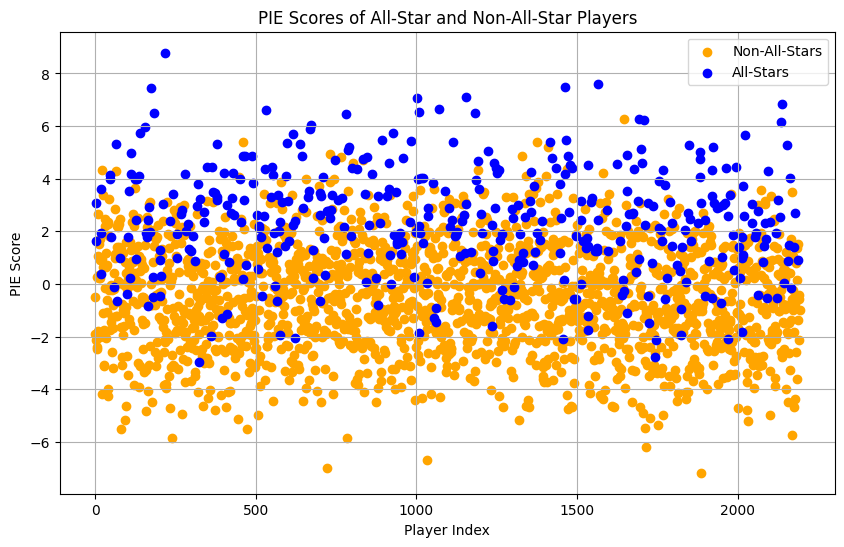

In [22]:
# Plot the scatter plot
plt.figure(figsize=(10, 6))

# Plot Non-All-Stars
plt.scatter(
    combined_df[combined_df['All-Star'] == 0].index, # Changed to filter DataFrame using boolean indexing
    combined_df[combined_df['All-Star'] == 0]['PIE_Score'],
    color='orange',
    label='Non-All-Stars'
)

# Plot All-Stars
plt.scatter(
    combined_df[combined_df['All-Star'] == 1].index, # Changed to filter DataFrame using boolean indexing
    combined_df[combined_df['All-Star'] == 1]['PIE_Score'],
    color='blue',
    label='All-Stars'
)

plt.xlabel('Player Index')
plt.ylabel('PIE Score')
plt.title('PIE Scores of All-Star and Non-All-Star Players')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
# Drop all-star players with PIE_Score less than 2
filtered_df = combined_df[~((combined_df['All-Star'] == 1) & (combined_df['PIE_Score'] < 0))]

# Filter for All-Star players
all_star_players = filtered_df[filtered_df['All-Star'] == 1]

# Select only Player name and PIE_Score columns
all_star_players = all_star_players[['Player', 'PIE_Score']]

# Display the result
print(all_star_players)


               Player  PIE_Score
2     Adley Rutschman   1.652062
3       Adolis García   3.092579
18        Austin Hays   0.374966
19       Austin Riley   3.606143
20        Bo Bichette   1.945546
...               ...        ...
2160   Prince Fielder   1.492879
2164    Robinson Canó   4.039171
2176     Torii Hunter   1.419109
2179  Troy Tulowitzki   2.705829
2187    Yadier Molina   0.899766

[356 rows x 2 columns]


In [37]:
# Save filtered_df to a CSV file
filtered_df.to_csv("/content/Merged_Stats_Normal.csv", index=False)

from google.colab import files

# Download the file
files.download('/content/Merged_Stats_Normal.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>